# TensorFlow Sequential Regression

The notebook is intended to show how to use TensorFlow Sequential model for a Regression Problem

In [1]:
# Import Standard Libraries
import os
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

import seaborn as sns

# Suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-06-15 22:39:38.164915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

# Read Data

In [3]:
# Define local data file paths
california_housing_train_file_path = Path(os.path.abspath('')).parents[1] / 'data' / 'california_housing_train.csv'

# Read data with Pandas DataFrame
california_housing_train = pd.read_csv(california_housing_train_file_path, index_col=0)

In [4]:
california_housing_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


# Data Preprocessing

## Feature Scaling

In [5]:
# Instance MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scale Data
california_housing_train_scaled = min_max_scaler.fit_transform(california_housing_train)

# Create back the DataFrame
california_housing_train_scaled = pd.DataFrame(california_housing_train_scaled, columns=california_housing_train.columns)

## Train & Test Split

In [6]:
# Define X and y
X = california_housing_train_scaled.iloc[:, :-1]
y = california_housing_train_scaled.iloc[:, -1]

In [7]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training

In [8]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [9]:
# Compile the model
model.compile(optimizer='rmsprop', loss='mse')

In [10]:
# Define early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                           mode='min', 
                                                           verbose=1, 
                                                           patience=5)

In [11]:
# Train the model
model.fit(X_train, 
          y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping_callback],
          epochs=50)

Epoch 1/50
778/778 [==============================] - 3s 2ms/step - loss: 0.0857 - val_loss: 0.0573
Epoch 2/50
778/778 [==============================] - 2s 2ms/step - loss: 0.0535 - val_loss: 0.0447
Epoch 3/50
778/778 [==============================] - 2s 2ms/step - loss: 0.0424 - val_loss: 0.0345
Epoch 4/50
778/778 [==============================] - 2s 2ms/step - loss: 0.0397 - val_loss: 0.0329
Epoch 5/50
778/778 [==============================] - 1s 2ms/step - loss: 0.0390 - val_loss: 0.0314
Epoch 6/50
778/778 [==============================] - 1s 2ms/step - loss: 0.0384 - val_loss: 0.0318
Epoch 7/50
778/778 [==============================] - 1s 1ms/step - loss: 0.0382 - val_loss: 0.0326
Epoch 8/50
778/778 [==============================] - 1s 2ms/step - loss: 0.0378 - val_loss: 0.0313
Epoch 9/50
778/778 [==============================] - 1s 1ms/step - loss: 0.0377 - val_loss: 0.0312
Epoch 10/50
778/778 [==============================] - 1s 1ms/step - loss: 0.0373 - val_loss: 0.0310

In [13]:
# Extract training history into a Pandas DataFrame
training_history = pd.DataFrame({'Validation Loss': model.history.history['val_loss'], 
                                 'Training Loss': model.history.history['loss'],
                                 'Epochs': range(26)})

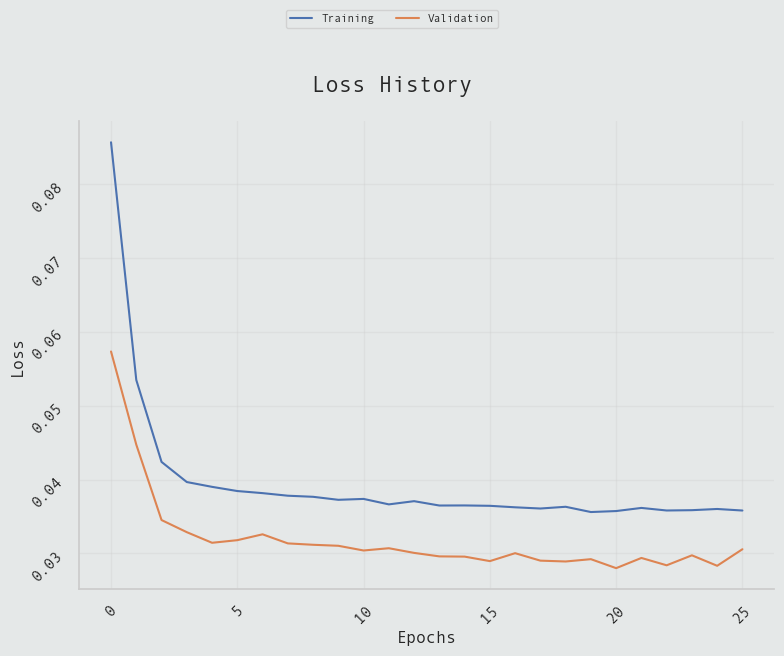

In [14]:
# Define figure and axes
figure, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the Lineplot
sns.lineplot(
    data=training_history,
    x='Epochs',
    y='Training Loss',
    label='Training'
)

# Plot the Lineplot
sns.lineplot(
    data=training_history,
    x='Epochs',
    y='Validation Loss',
    label='Validation'
)
    
# Set subplot tick rotation
ax.tick_params(labelrotation=45)

# Retrieve legend information
handles = ax.get_legend_handles_labels()[0]
labels = ax.get_legend_handles_labels()[1]
ax.legend().remove()

# Set labels
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')

# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.10), 
              fontsize=8,
              ncol=len(handles))

# Set figure Title
figure.suptitle('Loss History',
                fontweight='bold',
                fontsize=16)

plt.tight_layout()

# Model Evaluation

In [15]:
# Compute the MSE on test set
model.evaluate(X_test, y_test, verbose=0)

0.030554860830307007

383/383 [==============================] - 0s 950us/step


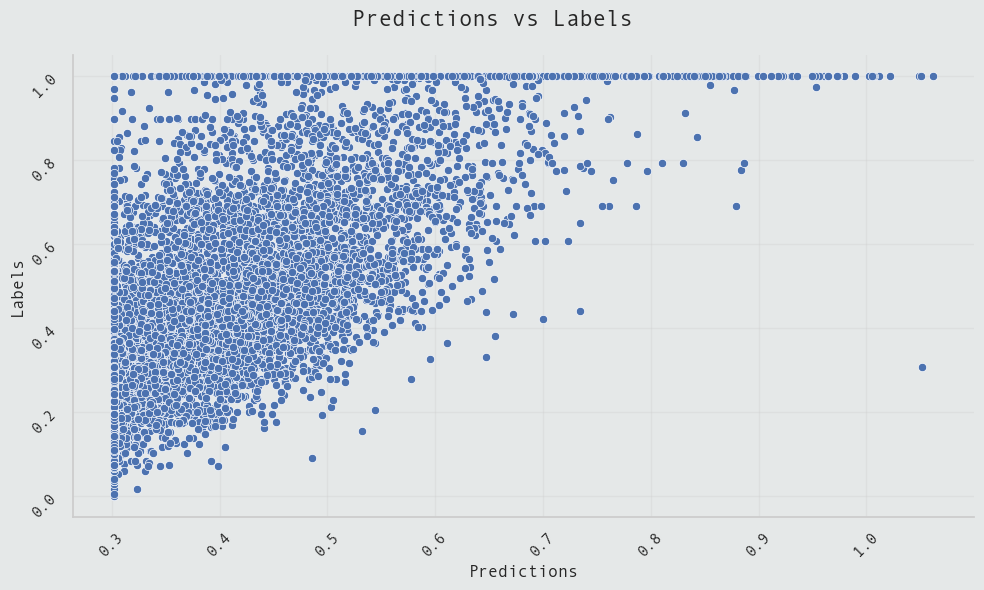

In [16]:
# Check test predictions vs true labels
test_predictions = model.predict(X_test)

test_evaluation = pd.DataFrame({'Predictions': test_predictions.reshape(-1,), 'Labels': y_test})

# Define figure and axes
figure, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the Lineplot
sns.scatterplot(
    data=test_evaluation,
    x='Predictions',
    y='Labels',
)
    
# Set subplot tick rotation
ax.tick_params(labelrotation=45)

# Set figure Title
figure.suptitle('Predictions vs Labels',
                fontweight='bold',
                fontsize=16)

plt.tight_layout()

# Save Model

In [17]:
# Save the model
model.save('california_housing_sequential_regressor.h5')

# Load Model

In [18]:
# Load the model
loaded_model = tf.keras.models.load_model('california_housing_sequential_regressor.h5')